In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#static dielectric constant of water
def static_dia_water(T):
    e_w0 = 88.045 - 0.4147*T + 6.295*1e-4*T**2 + 1.075e-5*T**3
    return e_w0

def chill_t_water(T):
    relax_t = (1.1109e-10 - 3.824e-12*T + 6.938e-14*T**2 - 5.096e-16*T**3) / (2*np.pi) # T in C
    return relax_t

def dielectric_water(f, T):
    e_inf = 4.9
    e_w0 = static_dia_water(T)
    rt = chill_t_water(T)
    e_real = e_inf + (e_w0 - e_inf) / (1 + (2*np.pi* f* rt)**2)
    e_imag = ((2*np.pi * f* rt)*(e_w0 - e_inf)) / (1 + (2*np.pi* f* rt)**2)

    test=e_inf+(e_w0-e_inf)/(1+np.pi*f*rt*2j)
    e_real=np.real(test)
    e_imag=np.imag(test)

    return e_real, e_imag


### Question 1

88.045
80.84705199999999


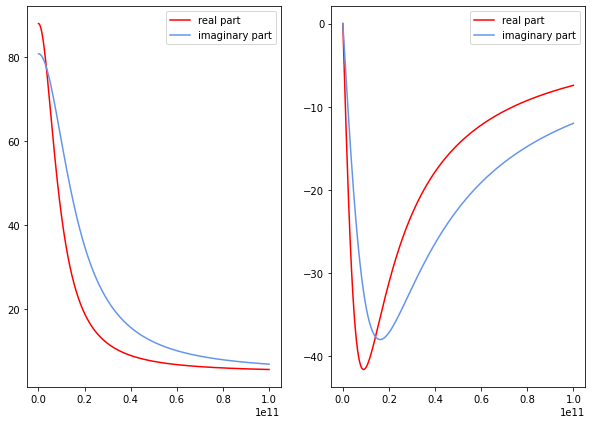

In [67]:
f = np.linspace(0, 100, 1000)*10**9


real_0,ima_0=dielectric_water(f,0)
real_18,ima_18=dielectric_water(f,18)

figure,(ax1,ax2)=plt.subplots(1,2,figsize=(10,7))
ax1.plot(f,real_0,label='real part',color='red')
ax1.plot(f,real_18,label='imaginary part',color='cornflowerblue')
ax1.legend()

ax2.plot(f,ima_0,label='real part',color='red')
ax2.plot(f,ima_18,label='imaginary part',color='cornflowerblue')
ax2.legend()

plt.show()

